## 一、相关库的引入
- seaborn：
  Seaborn是一种基于matplotlib的图形可视化python libraty。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。
- scipy：
  SciPy是一款方便、易于使用、专为科学和工程设计的Python工具包.它包括统计,优化,整合,线性代数模块,傅里叶变换,信号和图像处理,常微分方程求解器等等.
  

In [1]:
# 导入需要的模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn
from IPython import display

## 二、获取和读取数据集

In [2]:
data_train = pd.read_csv("./data/train.csv")
# data_train

## 三、数据分析

### 3.1 房价
因为我们最后关心的房价，首先直接来看一下*房价*分布情况：

绘制出关于*房价*的直方图和密度曲线，可见*房价*的密度分布接近正态分布，进一步可以使用**峰度（Kurtosis）**和 **偏度（Skewness）**来描述。

> 峰度（Kurtosis）:描述某变量所有取值分布形态<u>陡缓程度</u>的统计量。
>它是和正态分布相比较的。
>
>* Kurtosis=0 与正态分布的陡缓程度相同。
>
>* Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
>
>* Kurtosis<0 比正态分布的高峰来得平坦——平顶峰计算公式：β = M_4 /σ^4 偏度：
>
>偏度（Skewness）：描述某变量取值分布<u>对称性</u>的统计量。
>
>* Skewness=0 分布形态与正态分布偏度相同
>
>* Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
>
>* Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

可以发现：峰度和坡度均大于0，说明*房价*的概率密度曲线相比于正态分布高峰更加陡峭，向右边偏移；*房价*更多的集中在150000附近，并且150000的右侧概率相比于左侧概率更密集。

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


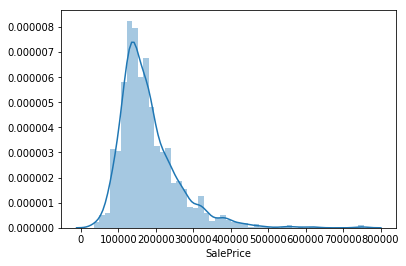

In [3]:
# data_train['SalePrice'].describe()
sns.distplot(data_train['SalePrice'])
# skewness and kurtosis
print(f"Skewness: {data_train['SalePrice'].skew()}")
print(f"Kurtosis: {data_train['SalePrice'].kurt()}")

### 3.2 其他属性
然后我们来看看可能决定*房价*的其他属性，数据集中给出的有79个，将这79个信息进行分类、概括，以便进行特征的选取。

首先将属性类型分类为三种：“building--0”、“space--1”、“location--2”。具体解释如下：
- building：比如房屋材料、造型等与房屋物理特性相关的特征（e.g. 'OverallQual'）
- space：即与房屋空间有关的特征，如面积(e.g. 'TotalBsmtSF')
- location：如地段、道路情况等(e.g. 'Neighborhood')

然后每种属性的数据类型分类两类：“数值型--0”和“类别型--1”

分类后的结果如下：

| 变量名        | 中文解释                 | 数据类型 | 分类     |
| ------------- | ------------------------ | -------- | -------- |
| MSSubClass    | 住宅类型                 | 1        | building |
| MSZoning      | 住宅所在分区类型         | 1        | location |
| LotFrontage   | 房子到街区的距离         | 0        | location |
| LotArea       | 面积                     | 0        | space    |
| Street        | 所在街道                 | 1        | location |
| Alley         | 所在小路                 | 1        | location |
| LotShape      | 户型不规则程度           | 1        | building |
| LandContour   | 平坦程度                 | 1        | building |
| Utilities     | 水电气供应               | 1        | building |
| LotConfig     | 位置（临街状态）         | 1        | location |
| LandSlope     | 倾斜程度                 | 1        | building |
| Neighborhood  | 邻接情况                 | 1        | location |
| Condition1    | 位置特征1（道路、铁路）  | 1        | location |
| Condition2    | 位置特征2（道路、铁路）  | 1        | location |
| BldgType      | 住宅类型（楼房类型）     | 1        | building |
| HouseStyle    | 风格                     | 1        | building |
| OverallQual   | 房屋的整体情况评级         | 1        | building |
| OverallCond   | 房屋的整体状况评级           | 1        | building |
| YearBuilt     | 建造年份                 | 1        | building |
| YearRemodAdd  | 重修年份                 | 1        | building |
| RoofStyle     | 屋顶类型                 | 1        | building |
| RoofMatl      | 屋顶材料                 | 1        | building |
| Exterior1st   | 外墙材料1                | 1        | building |
| Exterior2nd   | 外墙材料2                | 1        | building |
| MasVnrType    | 石材类型                 | 1        | building |
| MasVnrArea    | 石材面积                 | 0        | space    |
| ExterQual     | 外部材料质量评级         | 1        | building |
| ExterCond     | 外部材料现状评级         | 1        | building |
| Foundation    | 地基类型                 | 1        | building |
| BsmtQual      | 地基深度                 | 0        | space    |
| BsmtCond      | 地基现状评级             | 1        | building |
| BsmtExposure  | 地下室出口暴露情况       | 1        | building |
| BsmtFinType1  | 地下室第一次状况评级     | 1        | building |
| BsmtFinSF1    | 地下室第一次完工面积     | 0        | space    |
| BsmtFinType2  | 地下室第二次状况评级     | 1        | building |
| BsmtFinSF2    | 地下室第二次完工面积     | 0        | space    |
| BsmtUnfSF     | 地下室未完成面积         | 0        | space    |
| TotalBsmtSF   | 地下室总面积             | 0        | space    |
| Heating       | 供暖类型                 | 1        | building |
| HeatingQC     | 供热质量状况评级         | 1        | building |
| CentralAir    | 是否有中央空调           | 1        | building |
| Electrical    | 电力系统类型（熔断机制） | 1        | building |
| 1stFlrSF      | 一楼面积                 | 0        | space    |
| 2ndFlrSF      | 二楼面积                 | 0        | space    |
| LowQualFinSF  | 低质量完工面积           | 0        | space    |
| GrLivArea     | 地面以上面积             | 0        | space    |
| BsmtFullBath  | 地下室全浴室             | 0        | space    |
| BsmtHalfBath  | 地下室半浴室             | 0        | space    |
| FullBath      | 地面以上全浴室           | 0        | space    |
| HalfBath      | 地面以上半浴室           | 0        | space    |
| BedroomAbvGr  | 地面以上卧室             | 0        | space    |
| KitchenAbvGr  | 地面以上厨房             | 0        | space    |
| KitchenQual   | 厨房质量评级             | 1        | building |
| TotRmsAbvGrd  | 地面以上房间数           | 0        | space    |
| Functional    | 房屋功能完整程度         | 1        | building |
| Fireplaces    | 壁炉数量                 | 1        | building |
| FireplaceQu   | 壁炉质量评级             | 1        | building |
| GarageType    | 车库类型                 | 1        | building |
| GarageYrBlt   | 车库建造年份             | 1        | building |
| GarageFinish  | 车库装修是否完成         | 1        | building |
| GarageCars    | 车库容量                 | 0        | space    |
| GarageArea    | 车库面积                 | 0        | space    |
| GarageQual    | 车库质量评级             | 1        | building |
| GarageCond    | 车库现状评级             | 1        | building |
| PavedDrive    | 车道铺装类型             | 1        | building |
| WoodDeckSF    | 木质地板面积             | 0        | space    |
| OpenPorchSF   | 开放式门廊面积           | 0        | space    |
| EnclosedPorch | 封闭式门廊面积           | 0        | space    |
| 3SsnPorch     | 时令门廊面积             | 0        | space    |
| ScreenPorch   | 屏幕门廊面积             | 0        | space    |
| PoolArea      | 游泳池面积               | 0        | space    |
| PoolQC        | 游泳池质量评级           | 1        | building |
| Fence         | 栅栏质量评级             | 1        | building |
| MiscFeature   | 其他功能                 | 1        | building |
| MiscVal       | 该其他功能价值           | 1        | building |
| MoSold        | 卖出月份                 | 1        | building |
| YrSold        | 卖出年份                 | 1        | building |
| SaleType      | 交易类型                 | 1        | building |
| SaleCondition | 交易情况                 | 1        | building |

然后继续在这些特征中找一些认为比较重要的特征详细的看看。

#### 3.2.1 类别型属性

##### 3.2.1.1 CentralAir 中央空调

有中央空调的房子售价普遍要高一些

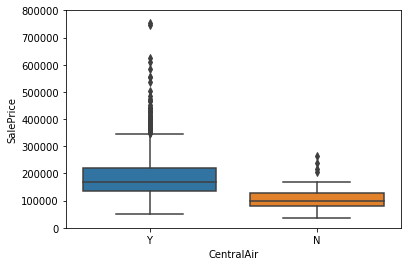

In [4]:
# CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1) # 横向表的拼接
fig = sns.boxplot(x=var, y="SalePrice", data=data)  # 绘制箱型图
fig.axis(ymin=0, ymax=800000);

##### 3.2.1.2 OverallQual 总体评价
评分越高售价越高

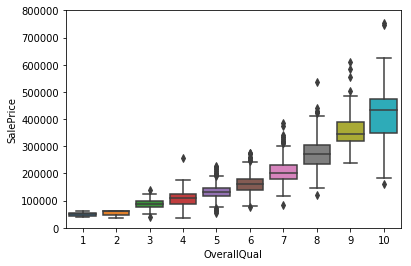

In [5]:
# OverallQual
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

##### 3.2.1.3 YearBuilt 建造年份
规律似乎不太明显，但是可以看出新建的房屋的售价会相对高一点，但是影响比较小。这一点散点图比箱型图表现的更加明显。

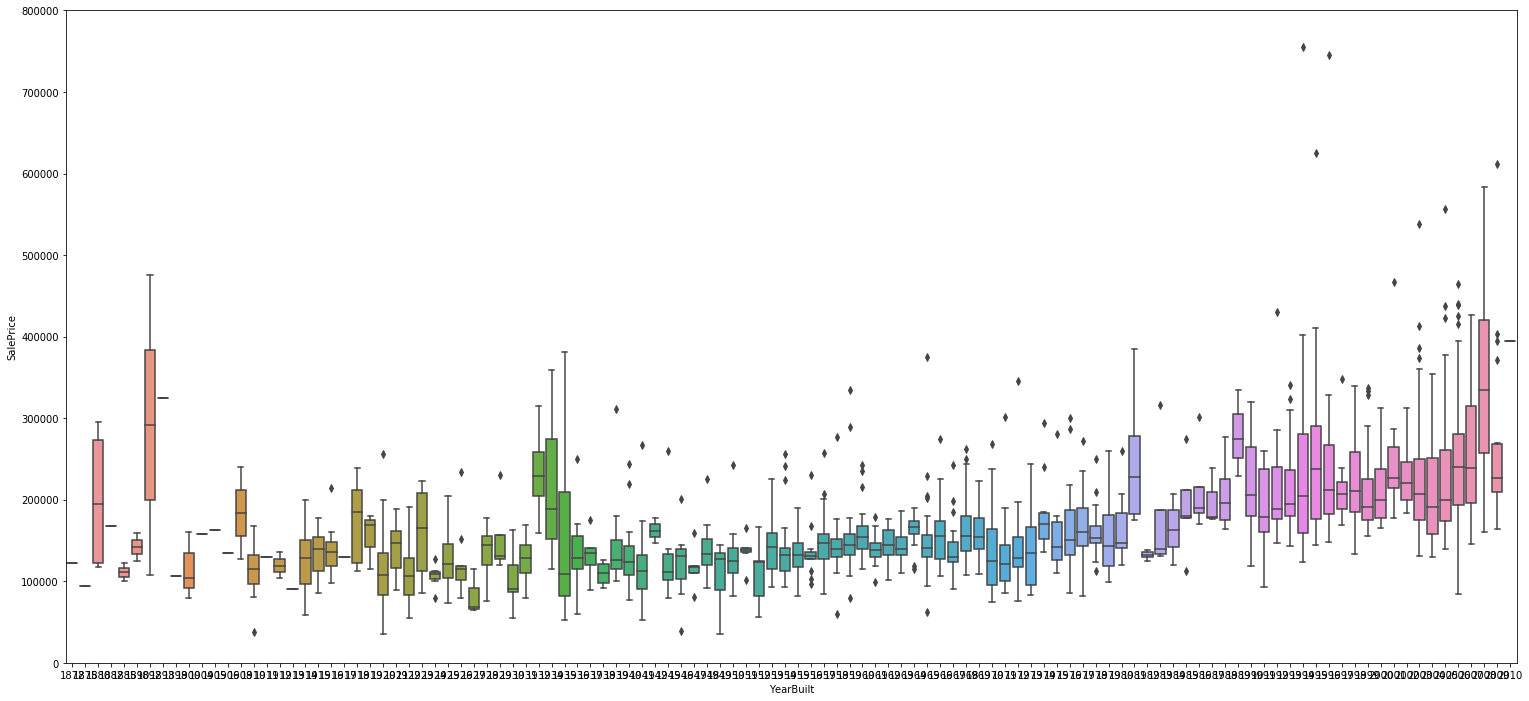

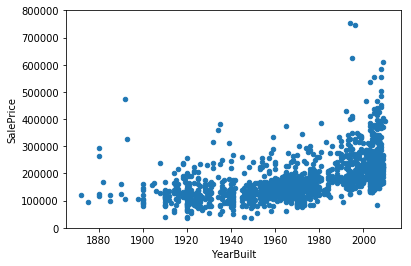

In [6]:
# YearBuilt boxplot
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12)) # 指定图片大小
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

##### 3.2.1.4 Neighborhood 地段
在一些地段（如*NoRidge*、*NridgHt*、*StoneBr*）房屋i的售价偏高，而另一些地段（如*BrkSide*、*MeadowV*）房屋的售价偏低；可见可对地段做一个聚类，存在高价格地段、低价格地段的分类。

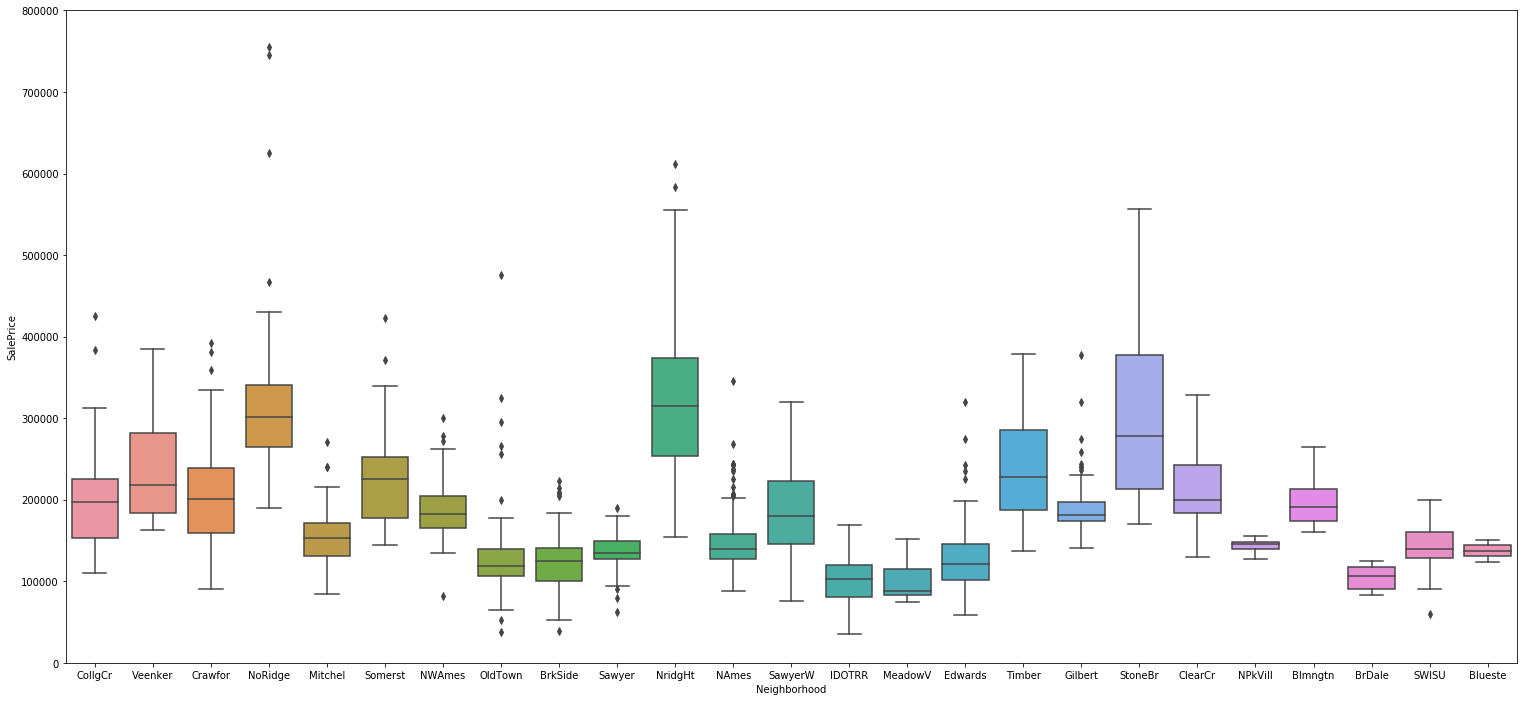

In [7]:
# Neighborhood  boxplot
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


#### 3.2.2 数值型特征

##### 3.2.2.1 LotArea 面积
在相同面积条件下，一般对应的价格比较分散；似乎地表面积对于价格的影响不大。

所以不考虑将面积作为特征属性。

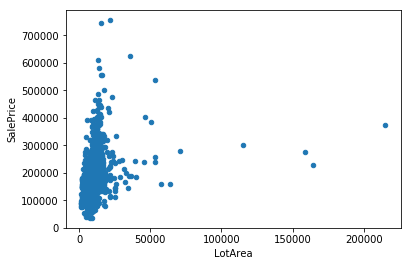

In [8]:
var ="LotArea"
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0.800000))

##### 3.2.2.2 GrLivArea 地表面积
地表面积的增加可能会导致房屋售价的增加，但是这种影响是不确定的，仍存在相当一部分数据，大地表面积的房屋和小地表面积的房屋售价相近。

但可以确认的是，地表面积影响了房屋售价的上限，房屋售价的上限大致与地表面积呈正比。

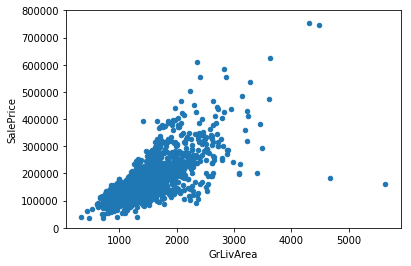

In [9]:
var ='GrLivArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.3 TotalBsmtSF 地下室总面积
地下室面积的增大会导致售价的升高，但这种影响不是一定的。

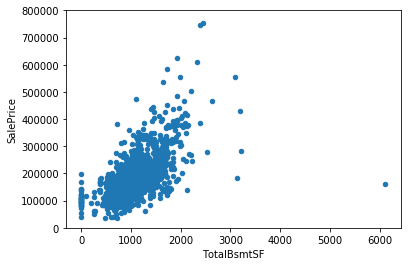

In [10]:
var ='TotalBsmtSF'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.4 MiscVal 其他功能价值 
其他功能价值的值不会对房屋价格产生太大影响。

所以不考虑将其他功能价值作为特征属性。

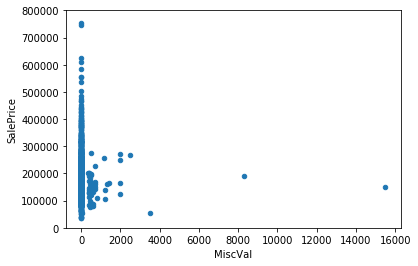

In [11]:
var='MiscVal'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.5  GarageArea 车库面积
车库面积的增大可能会导致售价增高

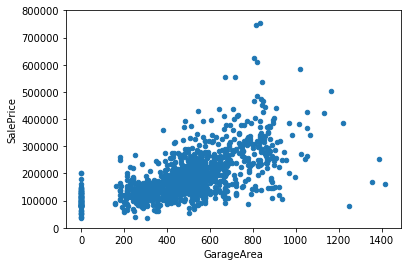

In [12]:
var='GarageArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.5  GarageCars 车库容量
车库容量的增大会导致房屋售价的上限增大。

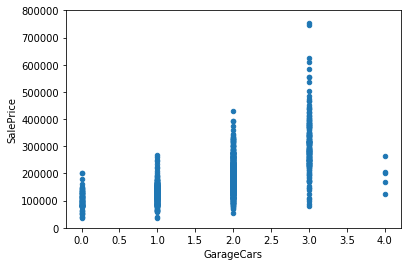

In [13]:
var='GarageCars'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

#### 3.2.3 更加详细的分析
上面选择了一些自己关心的属性进行分析，但是这是不全面和相当主观的，下面会用关系矩阵和关系点图进行进一步分析。

在开始之前可以先用散点图的方式将数据的分布情况画出，让我们有一个基本的感受。

In [46]:
# 数值量特征
feats_numeric  = data_train.dtypes[data_train.dtypes != "object"].index.values
#feats_numeric = [attr for attr in df_allX.columns if df_allX.dtypes[attr] != 'object']

# 字符量特征
feats_object = data_train.dtypes[data_train.dtypes == "object"].index.values
#feats_object = [attr for attr in df_allX.columns if df_allX.dtypes[attr] == 'object']
#feats_object = df_train.select_dtypes(include = ["object"]).columns

# 离散的数值量，需要人工甄别
feats_numeric_discrete  = ['MSSubClass','OverallQual','OverallCond'] # 户型、整体质量打分、整体条件打分 —— 文档中明确定义的类型量
feats_numeric_discrete += ['TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','GarageCars','Fireplaces'] # 房间数量
feats_numeric_discrete += ['FullBath','HalfBath','BsmtHalfBath','BsmtFullBath'] # 外国人这么爱洗澡？搞这么多浴室
feats_numeric_discrete += ['MoSold','YrSold'] # 年、月，这些不看成离散的应该也行

# 连续型特征
feats_continu = feats_numeric.copy()
# 离散型特征
feats_discrete = feats_object.copy()

for f in feats_numeric_discrete:
    feats_continu = np.delete(feats_continu,np.where(feats_continu == f))
    feats_discrete = np.append(feats_discrete,f)

print(feats_continu.shape,feats_discrete.shape)

(26,) (55,)


71个特征中有26个来连续型特征，55个离散性特征。

In [43]:
def plotfeats(frame,feats,kind,cols=4):
    """批量绘图函数。
    Parameters
    ----------
    frame : pandas.DataFrame
        待绘图的数据
    feats : list 或 numpy.array
        待绘图的列名称
    kind : str
        绘图格式：'hist'-直方图；'scatter'-散点图；'hs'-直方图和散点图隔行交替；'box'-箱线图，每个feat一幅图；'boxp'-Price做纵轴，feat做横轴的箱线图。
    cols : int
        每行绘制几幅图
    Returns
    -------
    None
    """
    rows = int(np.ceil((len(feats))/cols))
    if rows==1 and len(feats)<cols:
        cols = len(feats)
    #print("输入%d个特征，分%d行、%d列绘图" % (len(feats), rows, cols))
    if kind == 'hs': #hs:hist and scatter
        fig, axes = plt.subplots(nrows=rows*2,ncols=cols,figsize=(cols*5,rows*10))
    else:
        fig, axes = plt.subplots(nrows=rows,ncols=cols,figsize=(cols*5,rows*5))
        if rows==1 and cols==1:
            axes = np.array([axes])
        axes = axes.reshape(rows,cols) # 当 rows=1 时，axes.shape:(cols,)，需要reshape一下
    i=0
    for f in feats:
        #print(int(i/cols),i%cols)
        if kind == 'hist':
            #frame.hist(f,bins=100,ax=axes[int(i/cols),i%cols])
            frame.plot.hist(y=f,bins=100,ax=axes[int(i/cols),i%cols])
        elif kind == 'scatter':
            frame.plot.scatter(x=f,y='SalePrice',ylim=(0,800000), ax=axes[int(i/cols),i%cols])
        elif kind == 'hs':
            frame.plot.hist(y=f,bins=100,ax=axes[int(i/cols)*2,i%cols])
            frame.plot.scatter(x=f,y='SalePrice',ylim=(0,800000), ax=axes[int(i/cols)*2+1,i%cols])
        elif kind == 'box':
            frame.plot.box(y=f,ax=axes[int(i/cols),i%cols])
        elif kind == 'boxp':
            sns.boxplot(x=f,y='SalePrice', data=frame, ax=axes[int(i/cols),i%cols])
        i += 1
    plt.show()

In [48]:
plotfeats(data_train,feats_continu,kind='scatter',cols=6)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

分析上图：

- LotFrontage、LotArea、GrLivArea、1stFlrSF、2stFlrSF、GarageArea、BsmtFinSF1、TotalBsmtSF： 这几个面积和距离和售价呈明显正相关趋势

    - LotFrontage：房子到街道的距离，大多在50-100英尺（15-30米）

    - LotArea：占地面积（包括房屋、花园、前后院……），均值是10516平方英尺（900+平方米）

    - GrLivArea：地面以上整体面积

    - 1stFlrSF、2stFlrSF： 第1、 2层建筑面积

    - GarageArea：车库面积

    - BsmtFinSF1、BsmtFinSF2、TotalBsmtSF：地下室面积，很多房子还有第2个地下室

    - YearBuilt、YearRemodAdd、GarageYrBlt：从图中可以看出，建造年限对售价虽正相关，但坡度较小，关联度没有上面几个因素大，早点、晚点售价差不多

In [49]:
plotfeats(data_train,feats_numeric_discrete,kind='scatter',cols=6)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

分析上图：

- MSSubClass：户型，典型的离散型特征.

- OverallQual、OverallCond：房屋材料、新旧度、condition等的整体打分 —— 这个因为是人为打分，有可能存在给售价高的打高分，所以需要持怀疑态度


- TotRmsAbvGrd、GarageCars：房间数量、车库容量，可以看出和售价正相关
- YrSold、MoSold：卖出的年、月，都是06年～10年的数据，这两个特征和售价我觉得是没有关联的，可以考虑删除。
- 其他的特征看不出啥明显趋势

##### 3.2.3.1 关系矩阵
>**随机变量的方差的性质**：
>
>设X，Y是两个随机变量，E(X)，E(Y)，D(X)，D(Y)分别为各自的期望和方差，则有:
>
>$$D(X+Y)=D(X)+D(Y)+2E(X−E(X))(Y−E(Y)) \tag{$1$} $$
>
>特别的，当X，Y相互独立时，有:
>
>$$D(X+Y)=D(X)+D(Y) \tag{$2$} $$
>
>对比（1）式和（2）式知，X，Y相互独立时还应该有:
>$$E(X−E(X))(Y−E(Y))=0 \tag{$3$} $$
>
>这意味着当$E(X−E(X))(Y−E(Y))≠0$时，X与Y不相互独立，而是存在一定关系的。
>
>**相关系数和协方差**：
>
>我们把$E(X−E(X))(Y−E(Y))$拿出来，单独定义一个概念，即协方差，记为$Cov(X,Y)$，即：
>
>$$Cov(X,Y)=E(X−E(X))(Y−E(Y)) \tag{$4$}$$ 
>
>而
>
>$$ρ_{XY}=\frac{Cov(X,Y)}{\sqrt{DX}\sqrt{DY}} \tag{$5$} $$
>
>称为随机变量X，Y的相关系数。

计算每列属性的之间的相关系数，我们关注的是其他属性与*SalePrice*的相关性，将这些相关系数提取出来之后，按降序排序，可见将相关性最强的几个属性是*OverallQual*、*GrLivArea*、*GarageCars*，恰好我们之前关注过，说明我们平常关于房价的经验在这个数据集上也是符合的。

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

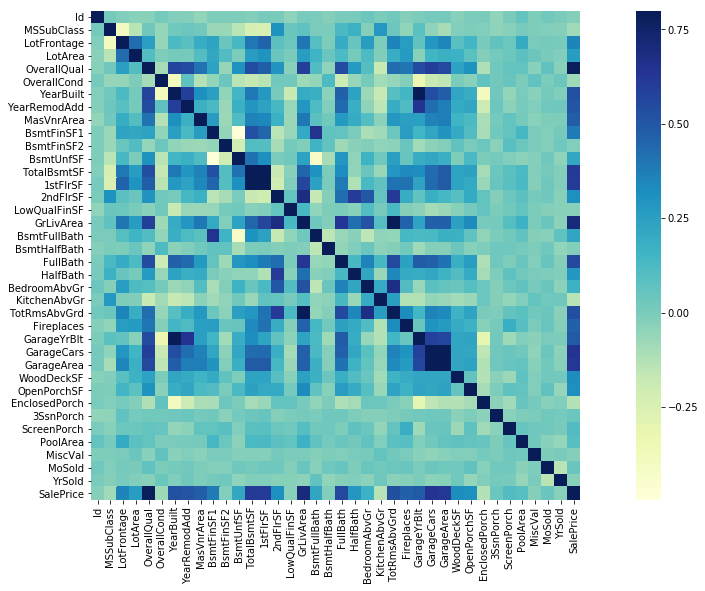

In [14]:
corrmat = data_train.corr() #计算列与列之间的相关系数，返回相关系数矩阵
f, ax = plt.subplots(figsize=(20, 9))
# 热度图  显示数据值的最大值为0.8，正方形网格
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="YlGnBu") 
corr=corrmat['SalePrice'].sort_values(ascending=False)
corr

仔细观察可以发现上面的矩阵中，属性远少于原本的79个，这是因为只有数值型的属性参与的了计算，而离散型的属性并没有，所以需要将这些属性进行处理。

这里仅对*CentralAir*和*Neighborhood*进行了转换。

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Neighborhood     0.210851
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

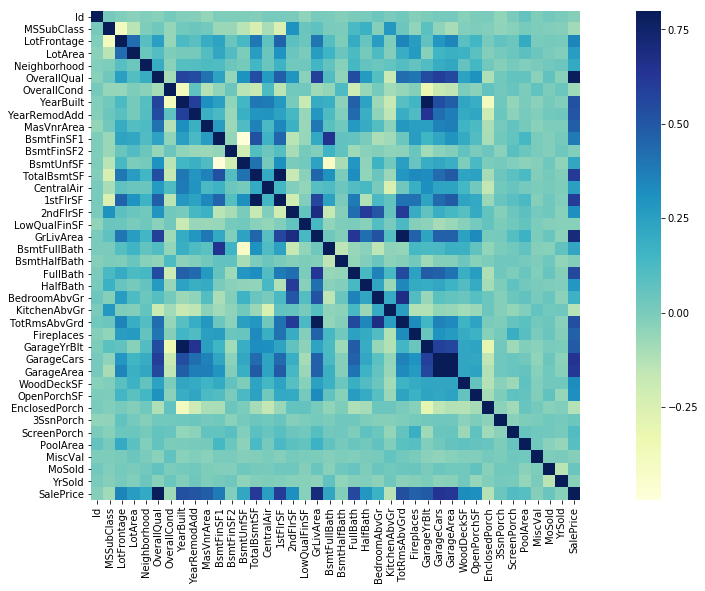

In [15]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="YlGnBu") 
corr=corrmat['SalePrice'].sort_values(ascending=False)
corr

#### 3.2.3.2 房价关系矩阵

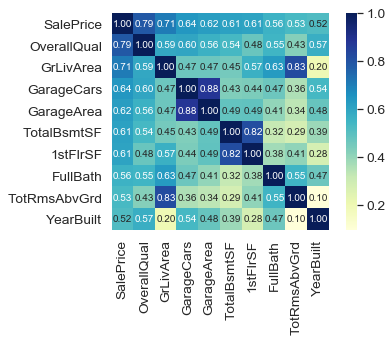

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [16]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="YlGnBu")
plt.show()
cols

我们在相关性最强的前9个属性中选取特征，这前十个特征分别是：'OverallQual'房屋的整体情况评级、'GrLivArea'地面以上面积,、'GarageCars'车库容量、'GarageArea'车库面积、'TotalBsmtSF'地下室总面积、'1stFlrSF'一层总面积、 'FullBath'地下室全浴室数量,、'TotRmsAbvGrd'地面以上房间数、 'YearBuilt'建造年份。

'GarageCars'车库容量和'GarageArea'车库面积中选取GarageCars作为特征。

'TotalBsmtSF'地下室总面积和'1stFlrSF'一层总面积选取TotalBsmtSF作为特征。

最终考虑的特征如下：

| Variable         | Segment | Data Type | Comments     |
| ---------------- | ------- | --------- | ------------ |
| **GrLivArea**    | 1       | 0         | 生活面积     |
| **TotRmsAbvGrd** | 1       | 0         | 总房间数     |
| **FullBath**     | 1       | 0         | 浴室数量     |
| **TotalBsmtSF**  | 1       | 0         | 地下室总面积 |
| **GarageCars**   | 1       | 0         | 车库         |
| **YearBuilt**    | 0       | 1         | 建造年份     |
| **OverallQual**  | 0       | 1         | 总体评价     |

## 四、预处理数据

In [17]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

标准化：原始分数减去平均数然后除以标准差；得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。使得预测结果不会被某些维度过大的特征值而主导

In [19]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

将所有的训练数据和测试数据的79个特征按样本连结，便于处理。

In [20]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features.shape

(2919, 79)

对连续数值的特征做标准化，然后对这些特征中的空缺值用均值0填充。

In [21]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply( lambda x: (x - x.mean()) / (x.std()))
# 标准化后，每个特征的均值变为0，所以可以直接用0来替换缺失值
all_features[numeric_features] = all_features[numeric_features].fillna(0)
all_features.shape

(2919, 79)

使用one-hot编码，将离散数值转成指示特征。编码后的属性有331个

In [22]:
all_features = pd.get_dummies(all_features, dummy_na=True)
# dummy_na=True将缺失值也当作合法的特征值并为其创建指示特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

将处理过的数据通过values属性得到NumPy格式的数据，并转成NDArray方便后面的训练。

In [23]:
#划分为训练子集和测试子集
n_train = train_data.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(train_data.SalePrice.values).reshape((-1, 1))

X_train,X_test, y_train, y_test = train_test_split(np.array(all_features[:n_train]),np.array(train_data.SalePrice.values).reshape(-1,1), test_size=0.33, random_state=42)
print(X_test.shape)
print(test_features.shape)
print(type(X_test))
print(type(test_features))
test_features = test_features.asnumpy()
print(type(test_features))

(482, 331)
(1459, 331)
<class 'numpy.ndarray'>
<class 'mxnet.ndarray.ndarray.NDArray'>
<class 'numpy.ndarray'>


## 五、模型选择

### 5.1 随机森林回归算法

由上面结果选择随机森林回归算法

In [24]:
loss = gloss.L2Loss() #L2 loss
def log_rmse( features, labels):
    # 将小于1的值设成1，使得取对数时数值更稳定
#     clipped_preds = nd.clip(net(features), 1, float('inf'))
#     clipped_preds = nd.clip(features, 1, float('inf'))
    rmse = nd.sqrt(2 * loss(features.log(), labels.log()).mean()) #❓为什么要根号内要两倍L2loss的平均值
    return rmse.asscalar() #大小为1的数组转标量

In [25]:
clfs = {
        'svm':svm.SVR(), # 支持向量回归模型
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),#随机森林回归算法
        'BayesianRidge':linear_model.BayesianRidge() # 贝叶斯回归模型
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)

        y_test = nd.array(y_test).reshape((-1, 1))
        y_pred = nd.array(y_pred).reshape((-1, 1))
#         print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
        print(clf + " cost:" ,log_rmse(y_pred,y_test))
    except Exception as e:
        print(clf + " Error:")
        
        print(str(e))
print(X_test.shape)

svm cost: 0.41268507
RandomForestRegressor cost: 0.14596958
BayesianRidge cost: 0.16081272
(482, 331)


只选择出相关性大的特征进行随机森林，rmse竟然变大了。

In [26]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values

X_train2,X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test2)
y_test = nd.array(y_test2).reshape((-1, 1))
y_pred = nd.array(y_pred).reshape((-1, 1))
print("RandomForestRegressor" + " cost:" ,log_rmse(y_pred,y_test))
# print(y_pred)
# 保存clf，共下面计算测试集数据使用
# rfr = clf

RandomForestRegressor cost: 0.16398141


验证测试集

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
# 之前训练的模型
# rfr=clf
rfr = RandomForestRegressor(n_estimators=400)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:

y_te_pred = rfr.predict(test_features)
print(y_te_pred)
print(y_te_pred.shape)
print(x.shape)

[126937.375  154588.53   186848.7625 ... 156661.425  116920.48
 228328.9725]
(1459,)
(1460, 7)


In [29]:
prediction = pd.DataFrame(y_te_pred, columns=['SalePrice'])
result = pd.concat([test_data['Id'], prediction], axis=1)
result.to_csv('./data/predictions.csv', index=False)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

### 5.2 基本的线性回归模型和平方损失函数

#### 数据导入和处理

In [30]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

将所有的训练数据和测试数据的79个特征按样本连结，便于处理。

In [31]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features.shape

(2919, 79)

对连续数值的特征做标准化，然后对这些特征中的空缺值用均值0填充。

In [32]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply( lambda x: (x - x.mean()) / (x.std()))
# 标准化后，每个特征的均值变为0，所以可以直接用0来替换缺失值
all_features[numeric_features] = all_features[numeric_features].fillna(0)
all_features.shape

(2919, 79)

使用one-hot编码，将离散数值转成指示特征。编码后的属性有331个

In [33]:
# dummy_na=True将缺失值也当作合法的特征值并为其创建指示特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

将处理过的数据通过values属性得到NumPy格式的数据，并转成NDArray方便后面的训练。

In [34]:
n_train = train_data.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(train_data.SalePrice.values).reshape((-1, 1))

#### 定义损失函数

定义比赛用来评价模型--对数均方根误差Root-Mean-Squared-Error (RMSE)：给定预测值 $\hat{y}_1$,…,$\hat{y}_n$ 和对应的真实标签 $y_1$,…,$y_n$ ，它的定义为
$$\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log(y_i)-\log(\hat y_i)\right)^2}$$

其中使用了L2损失函数，L2-loss的收敛速度要比L1-loss要快得多。

$$L_2=\left|{f(x)-y}\right| ^2$$

In [35]:
loss = gloss.L2Loss() #L2 loss
def log_rmse(net, features, labels):
    # 将小于1的值设成1，使得取对数时数值更稳定
    clipped_preds = nd.clip(net(features), 1, float('inf'))
    rmse = nd.sqrt(2 * loss(clipped_preds.log(), labels.log()).mean()) #❓为什么要根号内要两倍L2loss的平均值
    return rmse.asscalar() #大小为1的数组转标量

#### 定义训练模型
这里选择了基本的线性回归模型。

In [36]:
def get_net():
    """
    返回线性回归模型
    """
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    return net

In [37]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    """
    使用线性回归模型去拟合，并使用adam来优化参数。
    返回模型在训练集和测试集上的损失值。
    net：训练模型
    train_features：训练属性
    train_labels：训练标签
    test_features：测试属性
    test_labels：测试标签
    num_epochs：优化次数
    learning_rate：学习率
    weight_decay：权重衰减
    batch_size：批量大小
    """
    train_ls, test_ls = [], [] #损失值
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    # 这里使用了Adam优化算法
    trainer = gluon.Trainer(net.collect_params(), 'adam', {
        'learning_rate': learning_rate, 'wd': weight_decay})
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

K 折交叉验证

In [38]:
def get_k_fold_data(k, i, X, y):
    """
    返回第i折交叉验证时所需要的训练和验证数据。
    """
    assert k > 1 # 如果false，那么raise一个AssertionError
    fold_size = X.shape[0] // k # 向下取整
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # 切片
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = nd.concat(X_train, X_part, dim=0)
            y_train = nd.concat(y_train, y_part, dim=0)
    return X_train, y_train, X_valid, y_valid

In [39]:
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    """
    进行K 折交叉验证，用于调节超参数。
    k：交叉验证重复K次
    X_train：训练集属性
    y_train：训练集标签
    num_epochs：优化次数
    learning_rate：学习率
    weight_decay：权重衰减
    batch_size：批量大小
    """
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse',
                     range(1, num_epochs + 1), valid_ls,['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f'% (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

作图相关函数，其中 y 轴使用了对数尺度。

In [40]:
#作图函数semilogy
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
#     plt.locator_params('y',nbins=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
#     plt.ylim(0,1.5)
    plt.semilogy(x_vals, y_vals) #对数
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')


超参数选择并训练模型

fold 0, train rmse 0.170052, valid rmse 0.157288
fold 1, train rmse 0.162304, valid rmse 0.190529
fold 2, train rmse 0.163559, valid rmse 0.168020
fold 3, train rmse 0.167640, valid rmse 0.154546
fold 4, train rmse 0.162917, valid rmse 0.182984
5-fold validation: avg train rmse 0.165294, avg valid rmse 0.170674


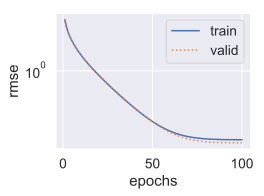

In [41]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f'% (k, train_l, valid_l))

#### 预测

train rmse 0.162397


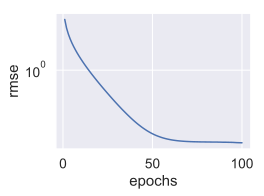

In [42]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ =  train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).asnumpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)


train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)